In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
single_image = x_train[0]

In [ ]:
single_image.shape

(28, 28)

In [ ]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

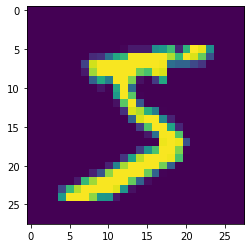

In [ ]:
plt.imshow(single_image)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_example = to_categorical(y_train)

In [ ]:
y_example.shape

(60000, 10)

In [ ]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test, num_classes = 10)

In [ ]:
y_cat_train = to_categorical(y_train, 10)

In [ ]:
single_image.max()

255

In [ ]:
single_image.min()

0

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test / 255

In [ ]:
scaled_image = x_train[0]

In [ ]:
scaled_image.max()

1.0

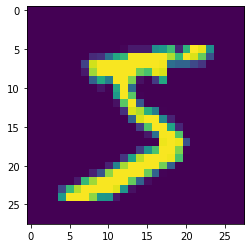

In [ ]:
plt.imshow(scaled_image)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
#batch size, width, height, color_channels 
x_train = x_train.reshape(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(4,4), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

# OUTPUT LAYER
model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [ ]:
model.fit(x_train, y_cat_train, epochs = 10, validation_data = (x_test, y_cat_test), callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1549 - accuracy: 0.9542 - val_loss: 0.0588 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0510 - accuracy: 0.9847 - val_loss: 0.0485 - val_accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0323 - accuracy: 0.9901 - val_loss: 0.0442 - val_accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0214 - accuracy: 0.9932 - val_loss: 0.0426 - val_accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0393 - val_accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0407 - val_accuracy: 0.9880


In [ ]:
metrics = pd.DataFrame(model.history.history)

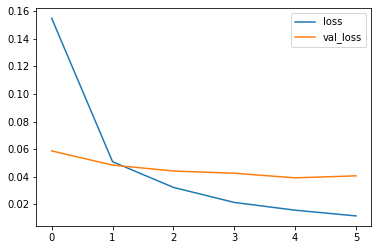

In [ ]:
metrics[['loss', 'val_loss']].plot()

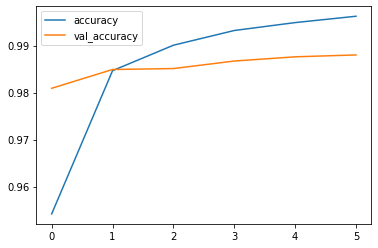

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test, y_cat_test, verbose = 1)

313/313 [==============================] - 3s 9ms/step - loss: 0.0407 - accuracy: 0.9880


[0.04070346802473068, 0.9879999756813049]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
confusion_matrix(y_test, predictions)

array([[ 974,    1,    1,    1,    0,    0,    2,    0,    1,    0],
       [   0, 1131,    1,    0,    0,    1,    1,    0,    1,    0],
       [   1,    5, 1015,    2,    0,    0,    3,    4,    1,    1],
       [   0,    0,    0, 1008,    0,    1,    0,    0,    1,    0],
       [   0,    0,    0,    0,  976,    0,    1,    0,    0,    5],
       [   0,    0,    0,    8,    0,  883,    1,    0,    0,    0],
       [   3,    2,    0,    1,    2,    9,  940,    0,    1,    0],
       [   0,    2,    6,    3,    0,    0,    0, 1003,    2,   12],
       [   3,    0,    2,    1,    0,    2,    1,    1,  961,    3],
       [   0,    1,    1,    9,    5,    4,    0,    0,    0,  989]])

In [ ]:
import seaborn as sns

In [ ]:
#plt.figure(figsize=(10,6))
#sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

In [ ]:
my_number = x_test[0]

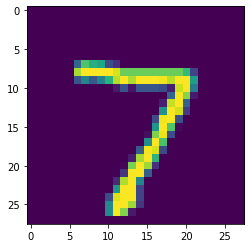

In [ ]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
# number of images, width, height, color chnannels 
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

array([7])